In [257]:
# Load basic libraries
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [258]:
df = pd.read_excel('https://github.com/khanmhmdi/CS-SBU-Data-Science/raw/main/static_files/assigments/Data_Train.xlsx')

In [259]:
df.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [260]:
df[['Ratings', 'Reviews']].head()

,Ratings,Reviews
0,8 customer reviews,4.0 out of 5 stars
1,14 customer reviews,3.9 out of 5 stars
2,6 customer reviews,4.8 out of 5 stars
3,13 customer reviews,4.1 out of 5 stars
4,1 customer review,5.0 out of 5 stars


In [261]:
df.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [262]:
df.shape

(5699, 9)

In [263]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
Title =  5130
Author =  3438
Edition =  3183
Reviews =  36
Ratings =  333
Synopsis =  5114
Genre =  335
-----> CATEGORICAL -----> BookCategory =  11
Price =  1538


In [264]:
df = df.drop_duplicates()

In [265]:
df.shape

(5699, 9)

In [266]:
# saving the priginal data
original_df = df.copy()

# Perform data cleaning operations
# Replace missing values with NaN
df.replace('', pd.NA, inplace=True)

# Drop unnecessary columns
# Calculate the percentage of missing values in each column
# the mean will give the proportion of True values, which represents the percentage of missing values in each column.
missing_percentages = df.isnull().mean() * 100

# Identify columns with high missing value percentages
high_missing_columns = missing_percentages[missing_percentages > 50].index.tolist()

# Identify columns with identical values
identical_columns = df.columns[df.nunique() == 1].tolist()

# Combine the lists of high missing value columns and identical value columns
unnecessary_columns = high_missing_columns + identical_columns

# Print the unnecessary columns
print("Unnecessary columns:")
print(high_missing_columns)
print(identical_columns)

Unnecessary columns:
[]
[]


In [267]:
for c in df.columns:
    if np.issubdtype(df[c].dtype, np.number):
        df = df[(np.abs(df[c] - df[c].mean()) / df[c].std()) < 3]  # Remove outliers

In [268]:
df.shape

(5607, 9)

In [269]:
df.columns[df.isnull().any()].tolist()

[]

## Univariate Variable Analysis



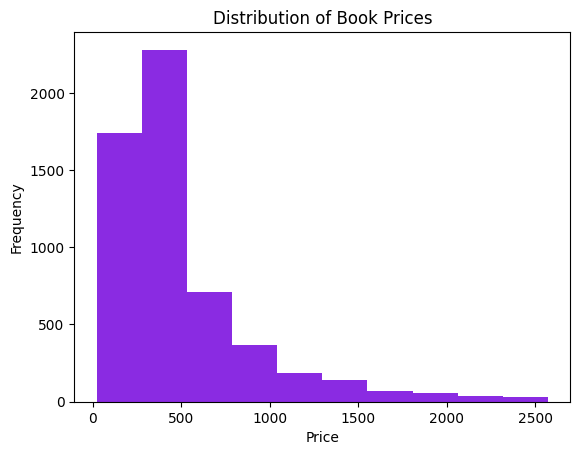

In [270]:
import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=10, color= 'blueviolet')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Book Prices')
plt.show()

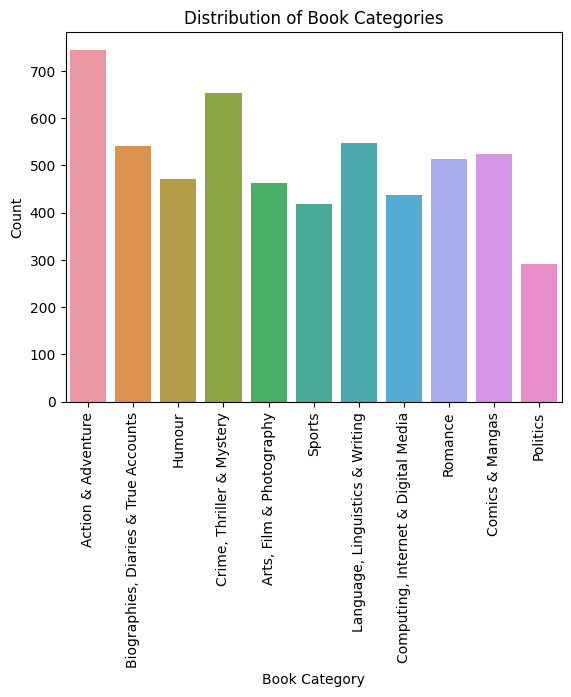

In [271]:
import seaborn as sns

sns.countplot(x=df['BookCategory'])
plt.xticks(rotation=90)
plt.xlabel('Book Category')
plt.ylabel('Count')
plt.title('Distribution of Book Categories')
plt.show()

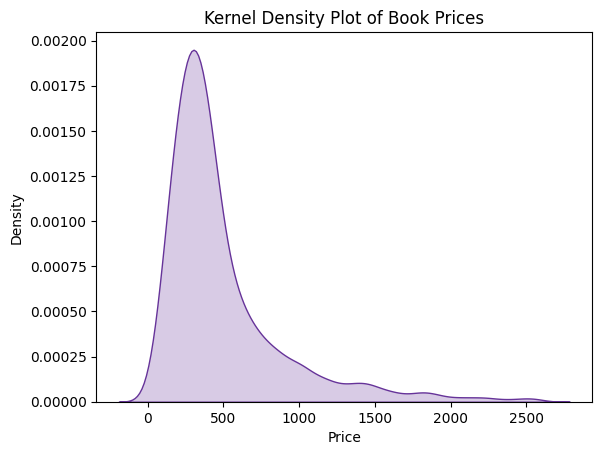

In [272]:
sns.kdeplot(df['Price'], fill=True, color = 'rebeccapurple')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Book Prices')
plt.show()

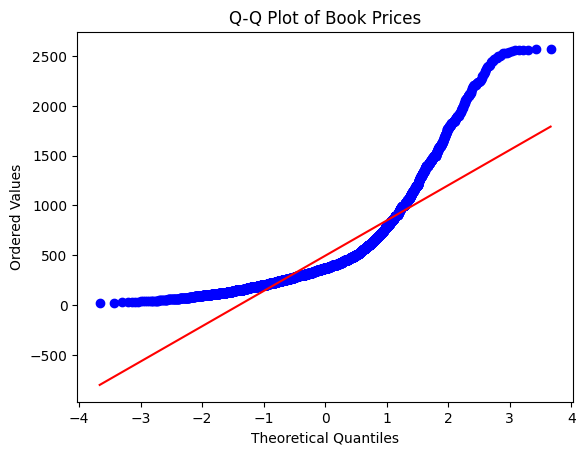

In [273]:
import scipy.stats as stats

# Create a Q-Q plot of a numerical variable against a normal distribution
q = stats.probplot(df['Price'], dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot of Book Prices')
plt.show()

## Basic Data Analysis



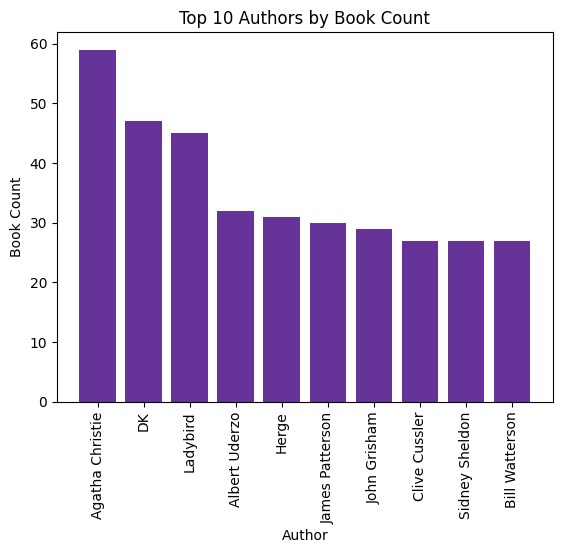

In [274]:
# Plot a bar chart of book counts by author
author_counts = df['Author'].value_counts().head(10)
plt.bar(author_counts.index, author_counts.values, color = 'rebeccapurple')
plt.xlabel('Author')
plt.ylabel('Book Count')
plt.title('Top 10 Authors by Book Count')
plt.xticks(rotation=90)
plt.show()

In [275]:

# Group the data by author and calculate the maximum price for each author
max_price_by_author = df.groupby('Author')['Price'].max()

# Sort the authors based on the maximum price in descending order
sorted_authors = max_price_by_author.sort_values(ascending=False)

# Get the top authors with the priciest books
top_authors = sorted_authors.head(5)  # Change the number to get more or fewer authors

# Print the top authors with their maximum book prices
for author, price in top_authors.iteritems():
    print(f"Author: {author}\tMax Price: {price}")

Author: Earl Woods	Max Price: 2571.96
Author: Wizards RPG Team	Max Price: 2570.0
Author: Lee Falk	Max Price: 2564.0
Author: Sjoukje Zaal	Max Price: 2559.0
Author: Antonio Mele	Max Price: 2559.0


<ipython-input-275-6008eaee35e2>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for author, price in top_authors.iteritems():


In [276]:
# Calculate the average price of books in each category
avg_price_by_BookCategory = df.groupby('BookCategory')['Price'].mean()
print("Average price by Book Category:")
print(avg_price_by_BookCategory)

Average price by Book Category:
BookCategory
Action & Adventure                      391.587007
Arts, Film & Photography                714.434989
Biographies, Diaries & True Accounts    339.150018
Comics & Mangas                         622.796457
Computing, Internet & Digital Media     767.901991
Crime, Thriller & Mystery               327.883914
Humour                                  589.525372
Language, Linguistics & Writing         420.742102
Politics                                463.727629
Romance                                 323.626693
Sports                                  676.318301
Name: Price, dtype: float64


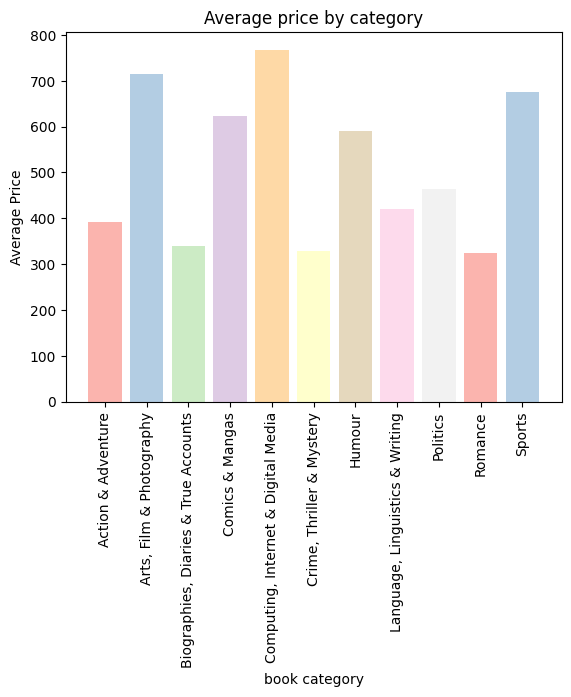

In [277]:
# Create a bar plot of average rating by genre
plt.bar(avg_price_by_BookCategory.index, avg_price_by_BookCategory.values, color = sns.color_palette('Pastel1'))
plt.xlabel('book category')
plt.ylabel('Average Price')
plt.title('Average price by category')
plt.xticks(rotation=90)
plt.show()

## Feature transformation

In [278]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the "price" column
df['price_scaled'] = scaler.fit_transform(df[['Price']])

# Print the scaled values
df.head(5)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,price_scaled
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.076562
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.069860
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0.107579
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.060857
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0.369311


In [279]:
# one hot encoding book category column
tmp = df.copy()

import pandas as pd

# Create a new DataFrame with one-hot encoded columns
one_hot_encoded = pd.get_dummies(tmp['BookCategory'], prefix='BookCategory')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded = pd.concat([tmp, one_hot_encoded], axis=1)

# Drop the original 'BookCategory' column
df_encoded.drop('BookCategory', axis=1, inplace=True)

# Print the encoded DataFrame
df_encoded.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,0,1,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,0,0,0,0,0,1,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0.060857,0,0,0,0,0,1,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0.369311,0,1,0,0,0,0,0,0,0,0,0


In [280]:
bookcat = df['BookCategory'].copy()

In [281]:
df = df_encoded.copy()
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [282]:
import re

def has_non_numeric_values(series):
    for value in series:
        if not pd.api.types.is_numeric_dtype(value) and not isinstance(value, float):
            return True
    return False

def extract_first_number(string):
    match = re.search(r'\d+(\.\d+)?', string)
    if match:
        return float(match.group())
    else:
        return None


tmp1 = df['Ratings']
tmp2 = df['Reviews']

tmp1 = tmp1.apply(extract_first_number)
print(has_non_numeric_values(tmp1))

tmp2 = tmp2.apply(extract_first_number)
print(has_non_numeric_values(tmp2))

False
False


In [283]:
df['Ratings'] = tmp1

df['Reviews'] = tmp2

In [284]:
# Switch the names of 'Reviews' and 'Ratings'
df = df.rename(columns={'Reviews': 'Temp'})
df = df.rename(columns={'Ratings': 'Reviews'})
df = df.rename(columns={'Temp': 'Ratings'})

In [285]:
df['Reviews'] = df['Reviews'].astype(int)
df[['Ratings', 'Reviews']].head(5)

,Ratings,Reviews
0,4.0,8
1,3.9,14
2,4.8,6
3,4.1,13
4,5.0,1


In [286]:
save = df.copy()

In [287]:
# Split the 'Edition' into 'String' and 'Date' columns
df[['Edition', 'Date']] = df['Edition'].str.split(',–', 1, expand=True)

<ipython-input-287-ba15c68786ed>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Edition', 'Date']] = df['Edition'].str.split(',–', 1, expand=True)


In [288]:
# Extract and convert the 'Date' column to datetime data type
date_pattern = r'(\d+\s\w+\s\d{4})'
df['Date'] = df['Date'].apply(lambda x: re.search(date_pattern, x).group(1) if re.search(date_pattern, x) else None)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [289]:
print(df.dtypes)
df.head(3)

Title                                                        object
Author                                                       object
Edition                                                      object
Ratings                                                     float64
Reviews                                                       int64
Synopsis                                                     object
Genre                                                        object
Price                                                       float64
price_scaled                                                float64
BookCategory_Action & Adventure                               uint8
BookCategory_Arts, Film & Photography                         uint8
BookCategory_Biographies, Diaries & True Accounts             uint8
BookCategory_Comics & Mangas                                  uint8
BookCategory_Computing, Internet & Digital Media              uint8
BookCategory_Crime, Thriller & Mystery          

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,"BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,...,0,0,0,0,0,0,0,0,0,2016-03-10
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,...,1,0,0,0,0,0,0,0,0,2012-11-07
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,...,0,0,0,0,1,0,0,0,0,1982-02-25


In [290]:
df.loc[df['Reviews'].idxmax(), 'Title']

'The Adventures of Sherlock Holmes and the Memoirs of Sherlock Holmes (Penguin Classics)'

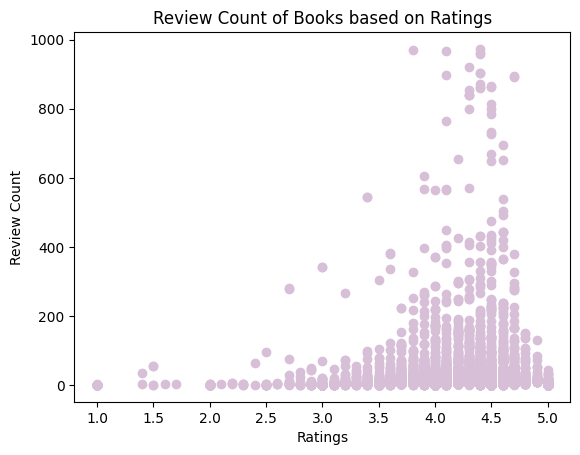

In [291]:
import matplotlib.pyplot as plt

# Plotting
plt.scatter(df['Ratings'], df['Reviews'], color = 'thistle')
plt.xlabel('Ratings')
plt.ylabel('Review Count')
plt.title('Review Count of Books based on Ratings')
plt.show()

In [292]:
# Create MinMaxScaler object
scaler = MinMaxScaler()

# Scale 'Ratings' column
df['ScaledReviews'] = scaler.fit_transform(df[['Reviews']])

In [293]:
df['ScaledReviews']

0       0.007202
1       0.013374
2       0.005144
3       0.012346
4       0.000000
          ...   
5602    0.008230
5603    0.001029
5604    0.027778
5605    0.000000
5606    0.006173
Name: ScaledReviews, Length: 5607, dtype: float64


## Feature Engineering



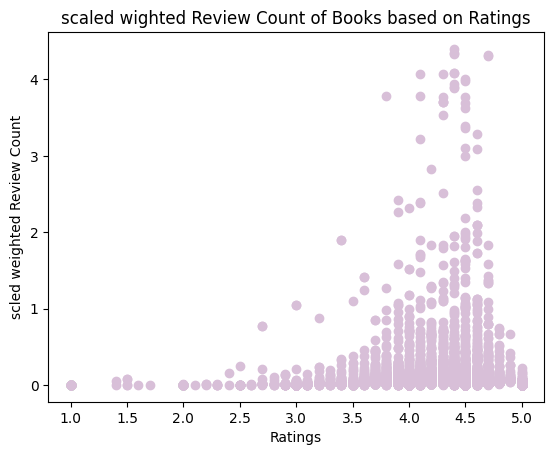

In [294]:
tmp = (df['ScaledReviews']) * df['Ratings']

plt.scatter(df['Ratings'], tmp, color = 'thistle')
plt.xlabel('Ratings')
plt.ylabel('scled weighted Review Count')
plt.title('scaled wighted Review Count of Books based on Ratings')
plt.show()

In [295]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the "price" column
df['ratings_scaled'] = scaler.fit_transform(df[['Ratings']])

df['overallQual'] = (1-df['price_scaled'])
df['overallQual'] *= df['ScaledReviews']
df['overallQual'] *= df['ratings_scaled']

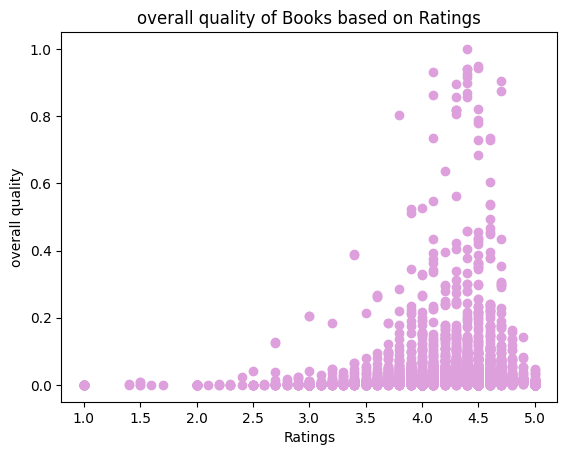

In [296]:
scaler = MinMaxScaler()
df['overallQual'] = scaler.fit_transform(df[['overallQual']])

plt.scatter(df['Ratings'], df['overallQual'], color = 'plum')
plt.xlabel('Ratings')
plt.ylabel('overall quality')
plt.title('overall quality of Books based on Ratings')
plt.show()

In [297]:
# Word count of book title
df['TitleWordCount'] = df['Title'].apply(lambda x: len(str(x).split()))

# Average word length in book description
df['SynopsisAvgWordLength'] = df['Synopsis'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))


#  length in book description
df['SynopsisLength'] = df['Synopsis'].apply(lambda x: len(x.split()))

In [298]:
df[['TitleWordCount', 'SynopsisAvgWordLength', 'SynopsisLength']]

,TitleWordCount,SynopsisAvgWordLength,SynopsisLength
0,6,5.038168,131
1,7,5.267760,183
2,3,5.587302,252
3,7,4.666667,75
4,6,5.346154,104
...,...,...,...
5602,12,5.423581,229
5603,6,4.995074,203
5604,5,4.678261,115
5605,1,5.108108,74


In [299]:
# Total books written by each author
author_book_count = df.groupby('Author')['Title'].count()
df['AuthorTotalBooks'] = df['Author'].map(author_book_count)

# Author experience (years since first published book)
df['PublicationYear'] = pd.to_datetime(df['Date']).dt.year
author_first_published = df.groupby('Author')['PublicationYear'].min()
df['AuthorExperience'] = df['Author'].map(author_first_published)
df['AuthorExperience'] = df['PublicationYear'] - df['AuthorExperience']

df[['AuthorExperience', 'PublicationYear', 'AuthorTotalBooks']]

,AuthorExperience,PublicationYear,AuthorTotalBooks
0,6.0,2016.0,4
1,0.0,2012.0,1
2,0.0,1982.0,2
3,9.0,2017.0,59
4,0.0,2006.0,1
...,...,...,...
5602,0.0,2005.0,1
5603,0.0,2016.0,1
5604,10.0,2016.0,13
5605,14.0,2008.0,2


In [300]:
# Extract publication month and year
df['PublicationMonth'] = pd.to_datetime(df['Date']).dt.month
df['PublicationYear'] = pd.to_datetime(df['Date']).dt.year

# Time since publication (in years)
df['YearsSincePublication'] = pd.to_datetime('today').year - df['PublicationYear']

# Seasonality (binary flags for each season)
df['IsSpring'] = df['PublicationMonth'].apply(lambda x: int(x in [3, 4, 5]))
df['IsSummer'] = df['PublicationMonth'].apply(lambda x: int(x in [6, 7, 8]))
df['IsFall'] = df['PublicationMonth'].apply(lambda x: int(x in [9, 10, 11]))
df['IsWinter'] = df['PublicationMonth'].apply(lambda x: int(x in [12, 1, 2]))

df[['PublicationMonth', 'YearsSincePublication', 'IsSpring', 'IsSummer', 'IsFall', 'IsWinter']]

,PublicationMonth,YearsSincePublication,IsSpring,IsSummer,IsFall,IsWinter
0,3.0,7.0,1,0,0,0
1,11.0,11.0,0,0,1,0
2,2.0,41.0,0,0,0,1
3,10.0,6.0,0,0,1,0
4,10.0,17.0,0,0,1,0
...,...,...,...,...,...,...
5602,8.0,18.0,0,1,0,0
5603,6.0,7.0,0,1,0,0
5604,1.0,7.0,0,0,0,1
5605,3.0,15.0,1,0,0,0


In [301]:
save = df.copy()

In [302]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the text data (e.g., book titles, descriptions)
title_bow_features = vectorizer.fit_transform(df['Title'])
description_bow_features = vectorizer.transform(df['Synopsis'])

# Get the feature names from the vocabulary
feature_names = vectorizer.get_feature_names_out()

# Convert the BoW features to DataFrames
title_bow_df = pd.DataFrame(title_bow_features.toarray(), columns=feature_names)
description_bow_df = pd.DataFrame(description_bow_features.toarray(), columns=feature_names)

# Concatenate the BoW features with the original DataFrame
df_with_bow_features = pd.concat([df, title_bow_df, description_bow_df], axis=1)
df_with_bow_features.head(3)

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,zoo,zoology,zuckerberg,zurich,zynpagua,ánd,उदय,कत,नय,बदलत
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,...,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,...,0,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
df['Edition'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Library Binding', '(German),Paperback',
       'Leather Bound', '(French),Paperback'], dtype=object)

In [304]:
df[df['Edition'] == '(Kannada),Paperback']

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,SynopsisLength,AuthorTotalBooks,PublicationYear,AuthorExperience,PublicationMonth,YearsSincePublication,IsSpring,IsSummer,IsFall,IsWinter
2298,English Speaking Course,"Gupta, R.K","(Kannada),Paperback",4.2,53,Product Dimensions: 9.4 x 7.2 x 0.7 inches Des...,Language Learning & Teaching (Books),93.0,0.026698,0,...,17,1,NaN,NaN,NaN,NaN,0,0,0,0


In [305]:
df[df['Edition'] == '(German),Paperback']

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,SynopsisLength,AuthorTotalBooks,PublicationYear,AuthorExperience,PublicationMonth,YearsSincePublication,IsSpring,IsSummer,IsFall,IsWinter
3238,Learn German With Stories: Momente in München:...,André Klein,"(German),Paperback",5.0,2,"In this sequel to ""Karneval in Köln,"" Dino is ...",German,557.0,0.208876,0,...,210,1,2014.0,0.0,11.0,9.0,0,0,1,0


In [306]:
df[df['Edition'] == '(French),Paperback']

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,SynopsisLength,AuthorTotalBooks,PublicationYear,AuthorExperience,PublicationMonth,YearsSincePublication,IsSpring,IsSummer,IsFall,IsWinter
5096,Larousse Student Dictionary French-English/Eng...,Larousse,"(French),Paperback",5.0,1,The Larousse Student Dictionary is designed sp...,Dictionaries,657.0,0.248139,0,...,51,3,2010.0,14.0,10.0,13.0,0,0,1,0


In [307]:
# one hot encoding edition column
tmp = df.copy()

values_to_replace = ['(Kannada),Paperback', '(German),Paperback', '(French),Paperback', 'Perfect Paperback']
tmp['Edition'] = tmp['Edition'].replace(values_to_replace, 'Paperback')

# Create a new DataFrame with one-hot encoded columns
one_hot_encoded = pd.get_dummies(tmp['Edition'], prefix='Edition')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded = pd.concat([tmp, one_hot_encoded], axis=1)

# Print the encoded DataFrame
df_encoded.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,...,0,0,0,0,0,1,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,...,0,0,0,0,0,1,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,...,0,0,0,0,0,1,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0.060857,0,...,0,0,0,0,0,1,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0.369311,0,...,1,0,0,0,0,0,0,0,0,0


In [308]:
df = df_encoded.copy()

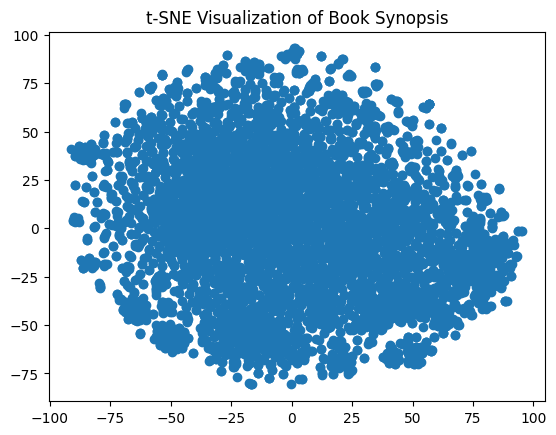

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Preprocess the synopsis text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Synopsis'])

# Perform t-SNE on the synopsis data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Create a scatter plot of the t-SNE transformed data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization of Book Synopsis')
plt.show()

In [309]:
# Add t-SNE transformed columns to the DataFrame
df['synopsis_tSNE1'] = X_tsne[:, 0]
df['synopsis_tSNE2'] = X_tsne[:, 1]

df

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover,synopsis_tSNE1,synopsis_tSNE2
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,...,0,0,0,1,0,0,0,0,-17.055553,74.753502
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,...,0,0,0,1,0,0,0,0,17.280346,-75.429550
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,...,0,0,0,1,0,0,0,0,0.275745,-5.384269
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0.060857,0,...,0,0,0,1,0,0,0,0,-15.115779,54.442539
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0.369311,0,...,0,0,0,0,0,0,0,0,64.937454,9.957278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,Who Ordered This Truckload of Dung?: Inspiring...,Ajahn Brahm,Paperback,4.9,9,“Laugh your way to enlightenment” with this in...,Buddhism (Books),1009.00,0.386343,0,...,0,0,0,1,0,0,0,0,2.627327,14.072456
5603,PostCapitalism: A Guide to Our Future,Paul Mason,Paperback,4.1,2,'The most important book about our economy and...,Macroeconomics Textbooks,781.00,0.296824,0,...,0,0,0,1,0,0,0,0,23.517149,-22.490129
5604,The Great Zoo Of China,Matthew Reilly,Paperback,4.1,28,The Chinese government has been keeping a secr...,Action & Adventure (Books),449.00,0.166473,0,...,0,0,0,1,0,0,0,0,21.086424,30.589025
5605,Engleby,Sebastian Faulks,Paperback,1.0,1,Mike Engleby has a secret...\n\nThis is the st...,Contemporary Fiction (Books),108.00,0.032588,0,...,0,0,0,1,0,0,0,0,9.929577,-39.440193


In [310]:
df.columns

Index(['Title', 'Author', 'Edition', 'Ratings', 'Reviews', 'Synopsis', 'Genre',
       'Price', 'price_scaled', 'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Date', 'ScaledReviews',
       'ratings_scaled', 'overallQual', 'TitleWordCount',
       'SynopsisAvgWordLength', 'SynopsisLength', 'AuthorTotalBooks',
       'PublicationYear', 'AuthorExperience', 'PublicationMonth',
       'YearsSincePublication', 'IsSpring', 'IsSummer', 'IsFall', 'IsWinter',
       'Edition_Board book', 'Edition_Cards', 'Edition_Flexibound',
       'Edition_Hardcover', 'Edition_Leather Bound', 'Edition_Library Bindin

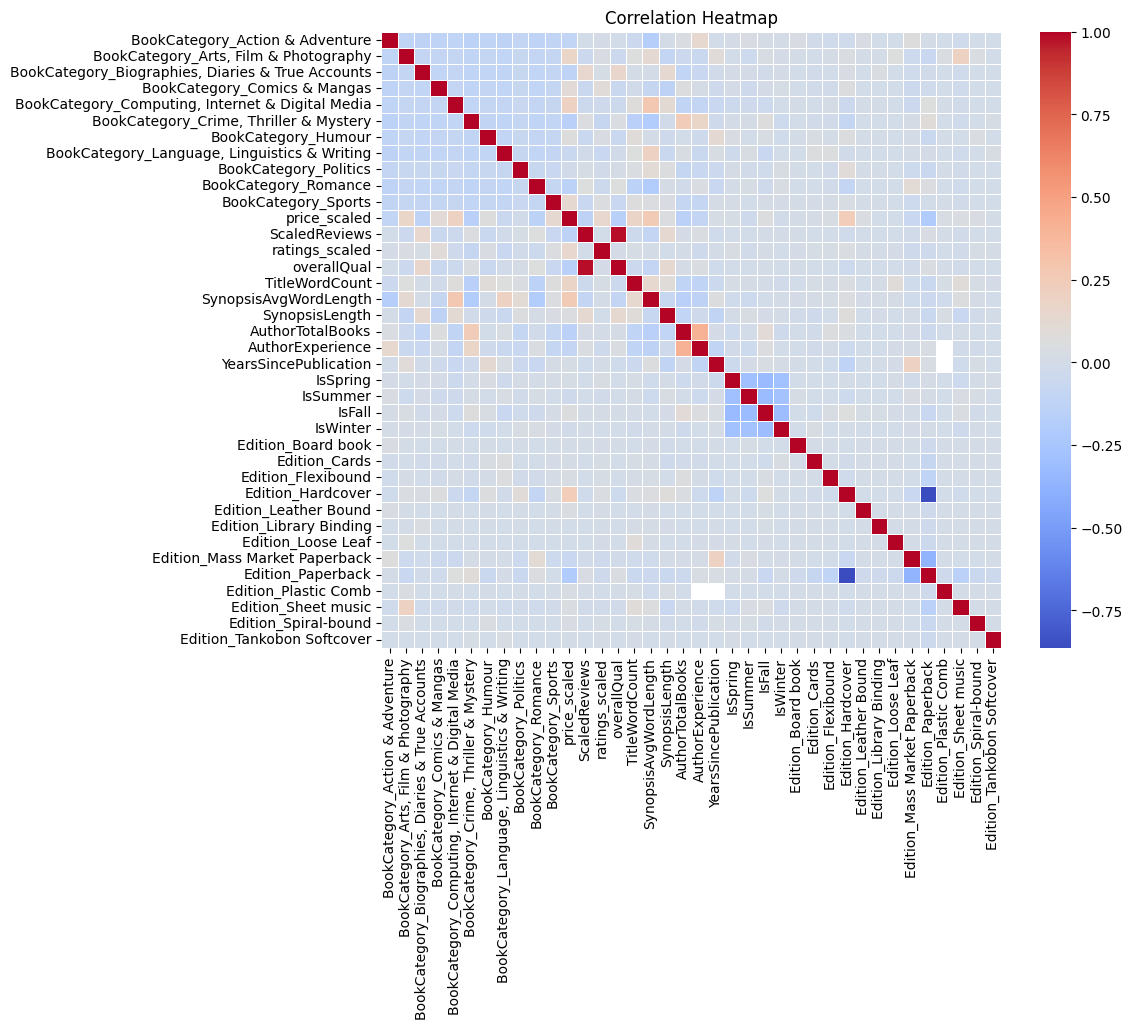

In [311]:
tmp = df[['BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'price_scaled', 'ScaledReviews',
       'ratings_scaled', 'overallQual', 'TitleWordCount',
       'SynopsisAvgWordLength', 'SynopsisLength', 'AuthorTotalBooks',
       'AuthorExperience', 'YearsSincePublication', 'IsSpring', 'IsSummer', 'IsFall', 'IsWinter',
       'Edition_Board book', 'Edition_Cards', 'Edition_Flexibound',
       'Edition_Hardcover', 'Edition_Leather Bound', 'Edition_Library Binding',
       'Edition_Loose Leaf', 'Edition_Mass Market Paperback',
       'Edition_Paperback', 'Edition_Plastic Comb', 'Edition_Sheet music',
       'Edition_Spiral-bound', 'Edition_Tankobon Softcover']]
# Compute the correlation matrix
corr_matrix = tmp.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [312]:
from sklearn.preprocessing import LabelEncoder

# Select the 'Genre' column
genre_column = df['Genre']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Genre' column
label_encoded_genre = label_encoder.fit_transform(genre_column)

# Replace the original 'Genre' column with the label encoded values
df['Genre_encoded'] = label_encoded_genre

# Print the updated DataFrame
df

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,Price,price_scaled,BookCategory_Action & Adventure,...,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover,synopsis_tSNE1,synopsis_tSNE2,Genre_encoded
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,0.076562,1,...,0,0,1,0,0,0,0,-17.055553,74.753502,1
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,0.069860,0,...,0,0,1,0,0,0,0,17.280346,-75.429550,71
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8,6,"""During the time men live without a common Pow...",International Relations,299.00,0.107579,0,...,0,0,1,0,0,0,0,0.275745,-5.384269,186
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,0.060857,0,...,0,0,1,0,0,0,0,-15.115779,54.442539,88
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,0.369311,0,...,0,0,0,0,0,0,0,64.937454,9.957278,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,Who Ordered This Truckload of Dung?: Inspiring...,Ajahn Brahm,Paperback,4.9,9,“Laugh your way to enlightenment” with this in...,Buddhism (Books),1009.00,0.386343,0,...,0,0,1,0,0,0,0,2.627327,14.072456,40
5603,PostCapitalism: A Guide to Our Future,Paul Mason,Paperback,4.1,2,'The most important book about our economy and...,Macroeconomics Textbooks,781.00,0.296824,0,...,0,0,1,0,0,0,0,23.517149,-22.490129,209
5604,The Great Zoo Of China,Matthew Reilly,Paperback,4.1,28,The Chinese government has been keeping a secr...,Action & Adventure (Books),449.00,0.166473,0,...,0,0,1,0,0,0,0,21.086424,30.589025,1
5605,Engleby,Sebastian Faulks,Paperback,1.0,1,Mike Engleby has a secret...\n\nThis is the st...,Contemporary Fiction (Books),108.00,0.032588,0,...,0,0,1,0,0,0,0,9.929577,-39.440193,88


In [313]:
df.columns

Index(['Title', 'Author', 'Edition', 'Ratings', 'Reviews', 'Synopsis', 'Genre',
       'Price', 'price_scaled', 'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Date', 'ScaledReviews',
       'ratings_scaled', 'overallQual', 'TitleWordCount',
       'SynopsisAvgWordLength', 'SynopsisLength', 'AuthorTotalBooks',
       'PublicationYear', 'AuthorExperience', 'PublicationMonth',
       'YearsSincePublication', 'IsSpring', 'IsSummer', 'IsFall', 'IsWinter',
       'Edition_Board book', 'Edition_Cards', 'Edition_Flexibound',
       'Edition_Hardcover', 'Edition_Leather Bound', 'Edition_Library Bindin

In [ ]:
from sklearn.model_selection import train_test_split


tmp = df[['Price', 'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'ScaledReviews',
       'ratings_scaled', 'TitleWordCount',
       'SynopsisAvgWordLength', 'SynopsisLength', 'AuthorTotalBooks',
       'PublicationYear', 'AuthorExperience',
       'YearsSincePublication', 'IsSpring', 'IsSummer', 'IsFall', 'IsWinter',
       'Edition_Board book', 'Edition_Cards', 'Edition_Flexibound',
       'Edition_Hardcover', 'Edition_Leather Bound', 'Edition_Library Binding',
       'Edition_Loose Leaf', 'Edition_Mass Market Paperback',
       'Edition_Paperback', 'Edition_Plastic Comb', 'Edition_Sheet music',
       'Edition_Spiral-bound', 'Edition_Tankobon Softcover', 'synopsis_tSNE1',
       'synopsis_tSNE2', 'Genre_encoded']]


for c in tmp.columns:
  tmp.loc[:, c] = tmp[c].fillna(tmp[c].mode()[0])

target = 'Price'
features = tmp.drop(target, axis=1)
target = tmp[target]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## Modeling

Do not change this part of the code only run it!

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X_train (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y_train (numpy.ndarray or pandas.Series): The target variable for training data with (n_rows, 1) shape.
    X_test (numpy.ndarray or pandas.DataFrame): The test data with (n_rows, n_features) shape.
    y_test (numpy.ndarray or pandas.Series): The target variable for test data with (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions (train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions (test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor(criterion='squared_error')
    random_forest_regressor.fit(X_train, y_train)

    y_pred_train = random_forest_regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = random_forest_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    importances = random_forest_regressor.feature_importances_

    return mse_train, mse_test, importances, random_forest_regressor


In [333]:
mse_train, mse_test, imp, rfr = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

Train mse is: 14207.211913909694 // Test mse is: 106291.56934047447


## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.

In [334]:
predicted_values = rfr.predict(X_test)

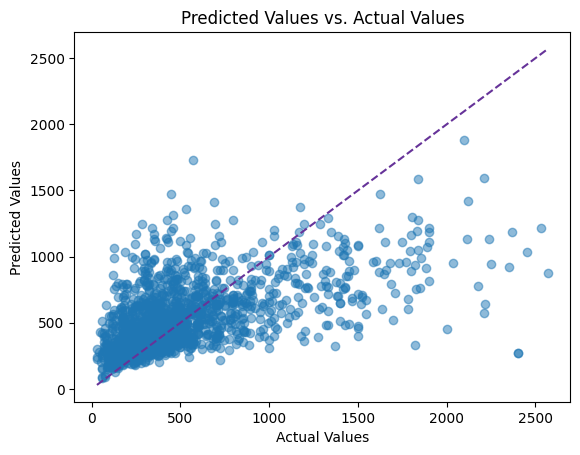

In [336]:
plt.scatter(y_test, predicted_values, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='rebeccapurple', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values')
plt.show()

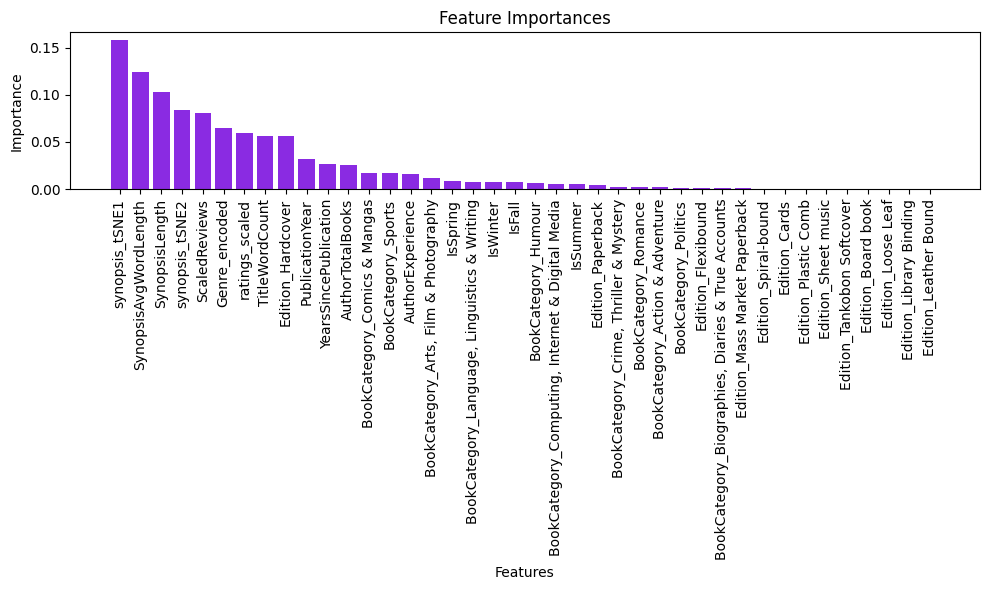

In [340]:
feature_names = features.columns
indices = np.argsort(imp)[::-1]
sorted_feature_names = feature_names[indices]
sorted_importances = imp[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, color = 'blueviolet')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()